In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
#Defino mis variables
X_train=df_train.drop(['smoking'],axis=1)
y_train=df_train['smoking']
#limpio id para el resto del ejercicio
X_train = X_train.drop(['id'], axis=1)


In [4]:
#Me cercioro para fases posteriores de preprocesamiento como son los datos que tengo
df_train.isnull().sum() #no tiene valores perdidos
df_train.dtypes # todos son int64 y float64
#X_train.head(2).T

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

### Histogramas - abajo comento lo que observo en ellos

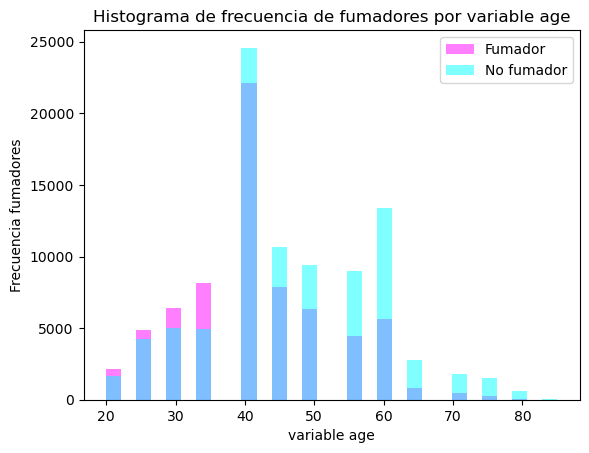

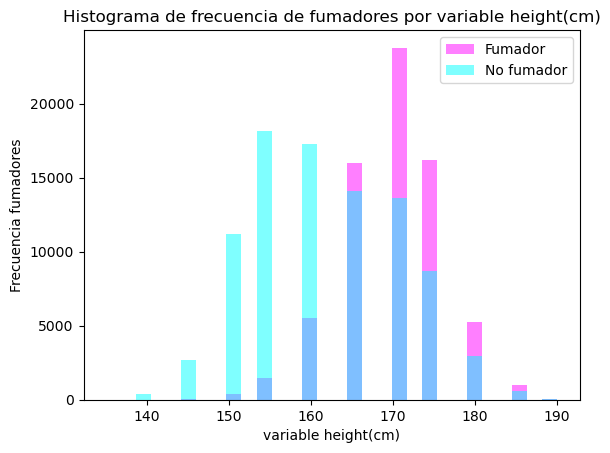

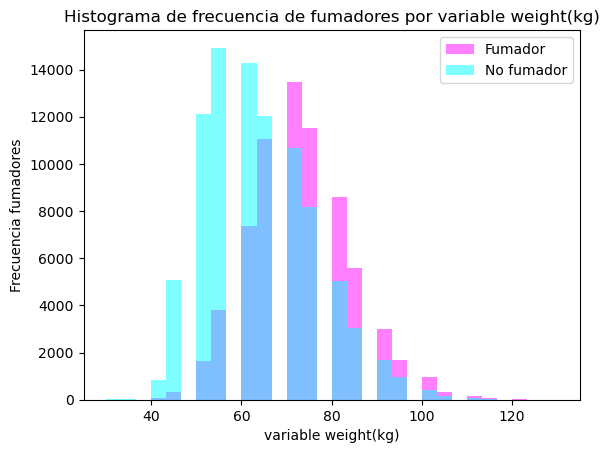

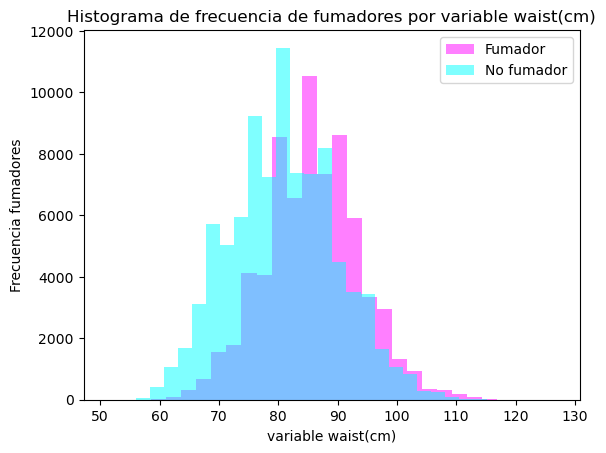

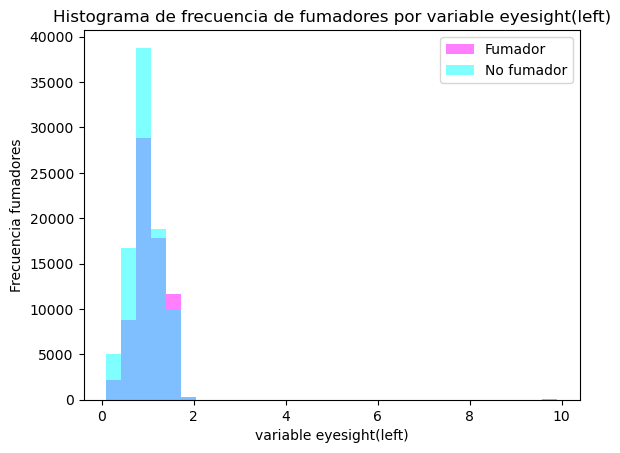

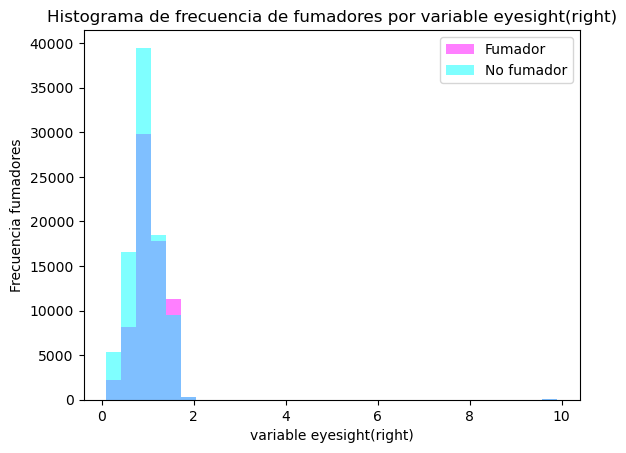

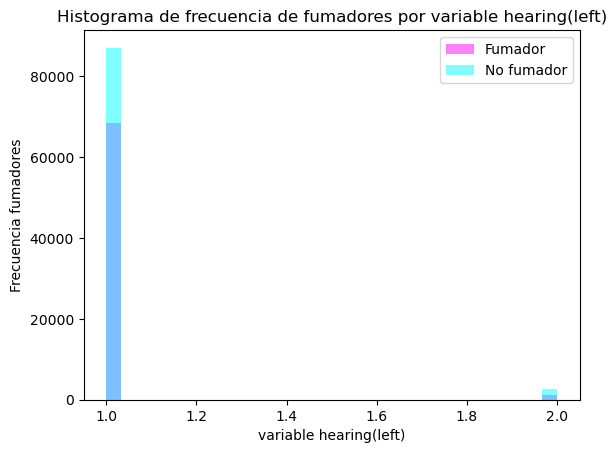

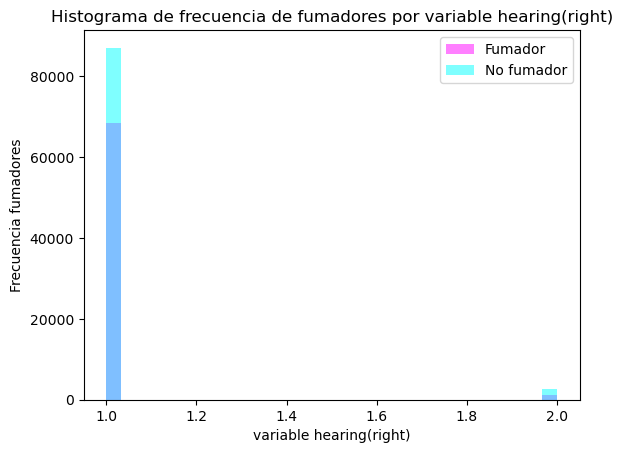

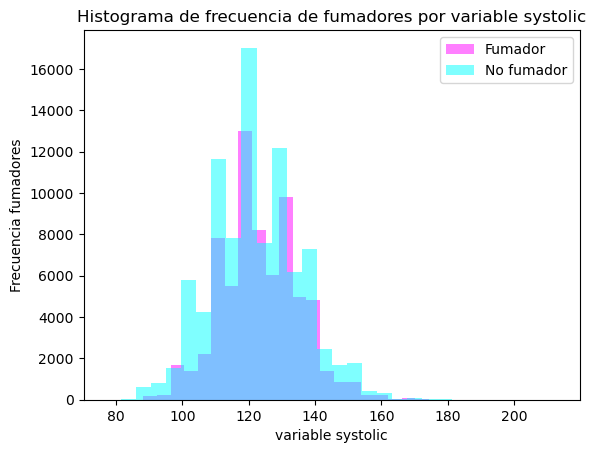

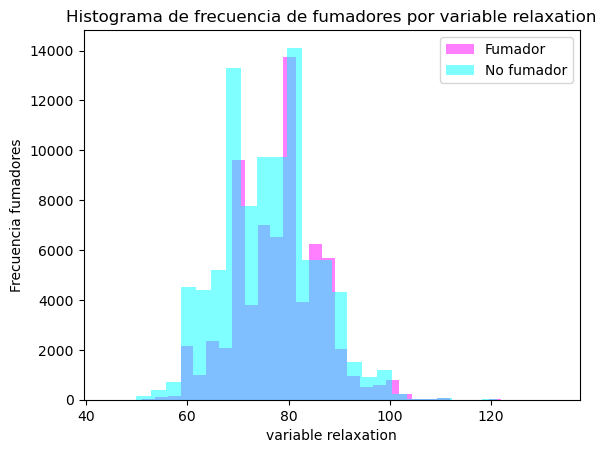

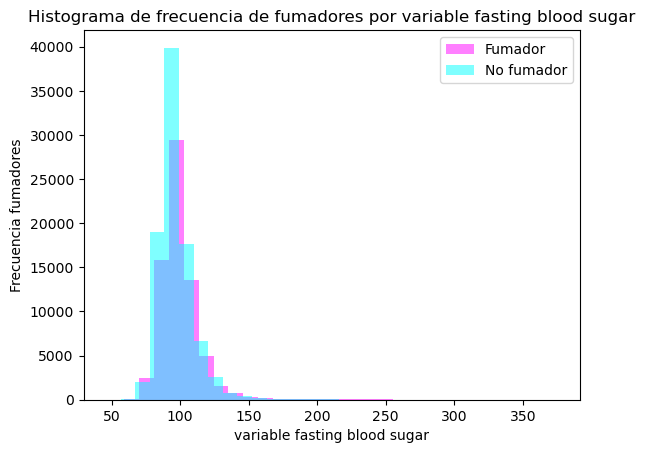

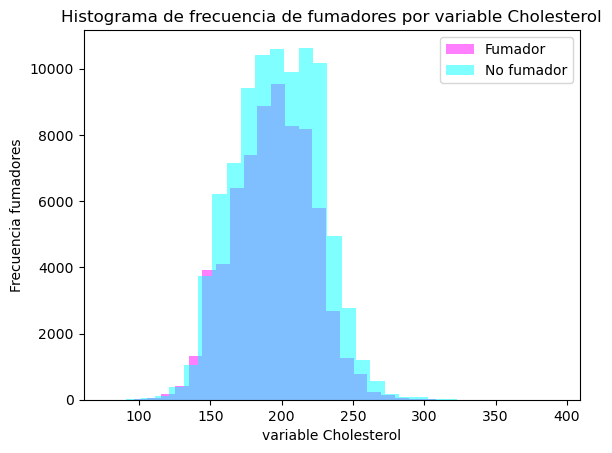

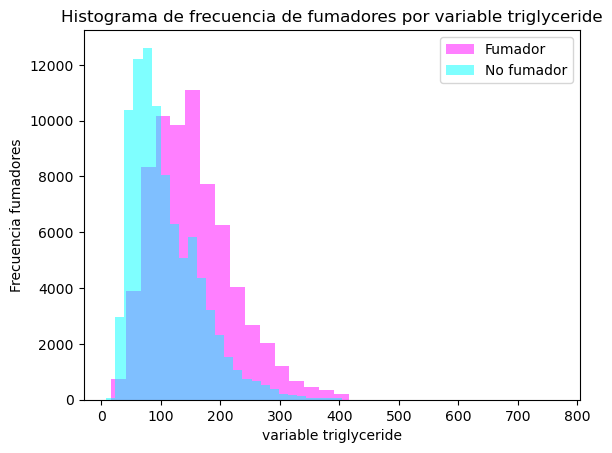

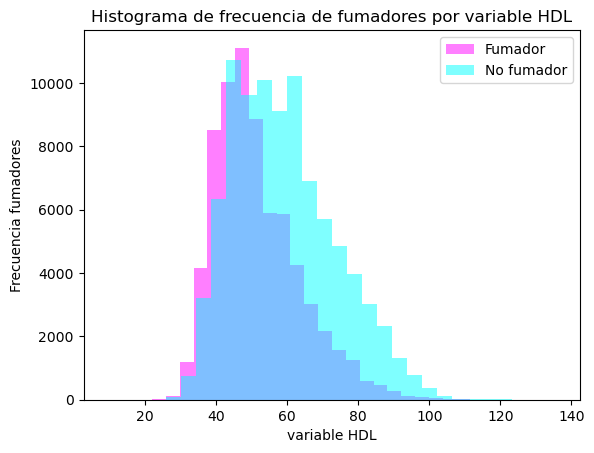

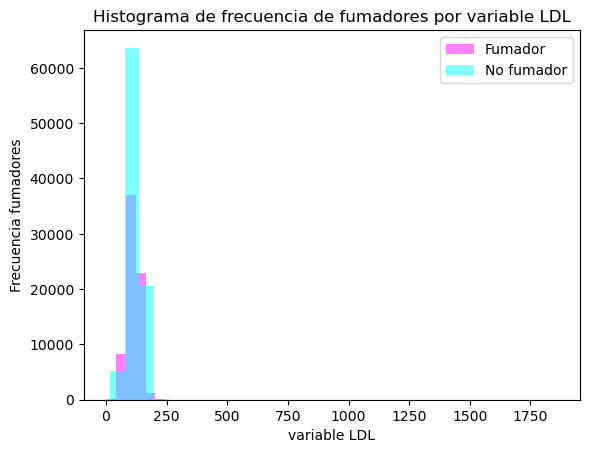

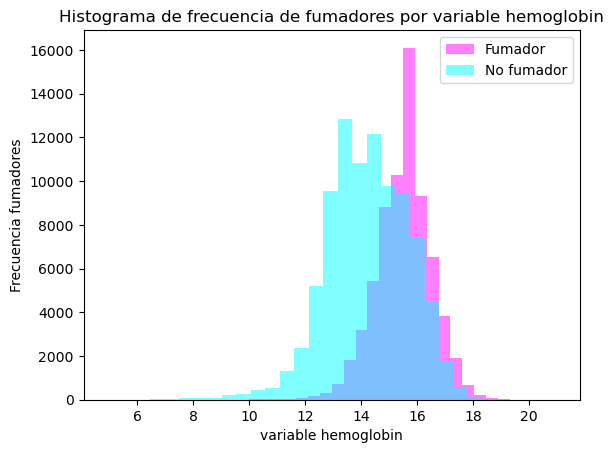

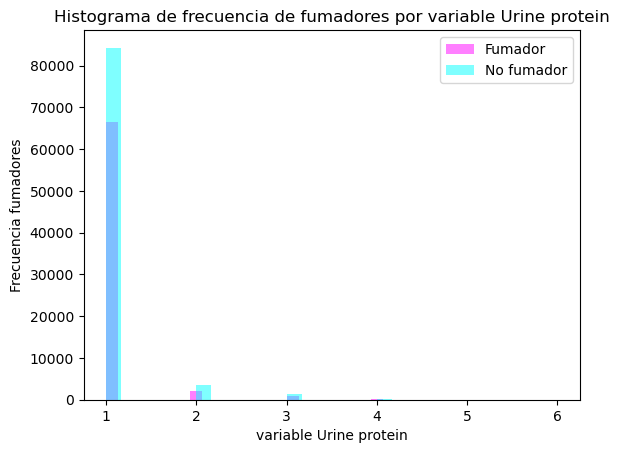

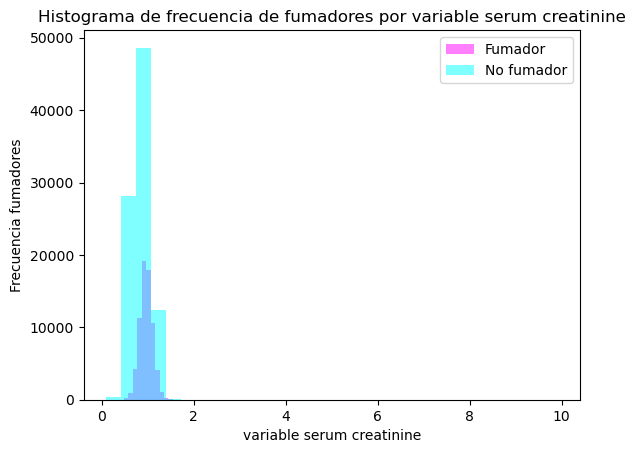

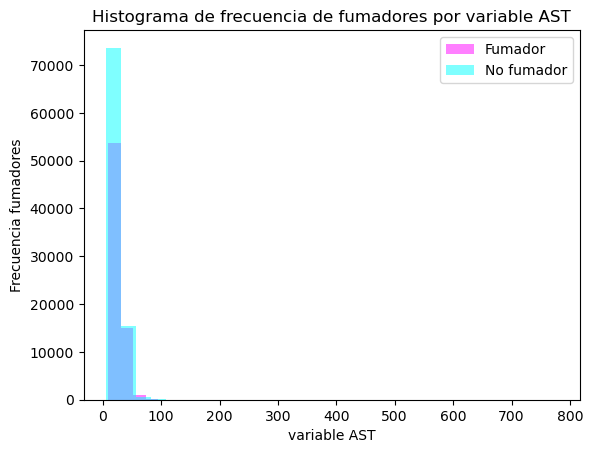

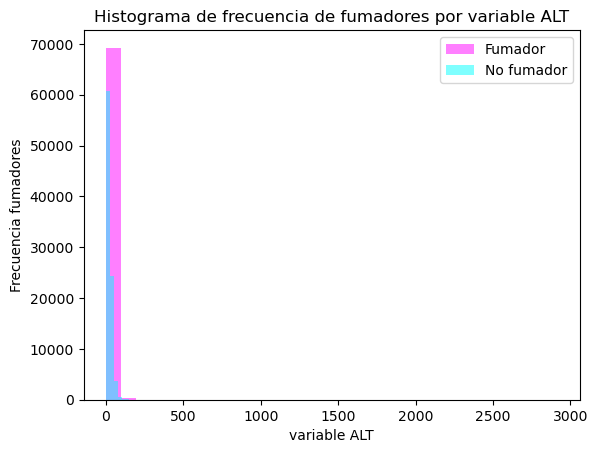

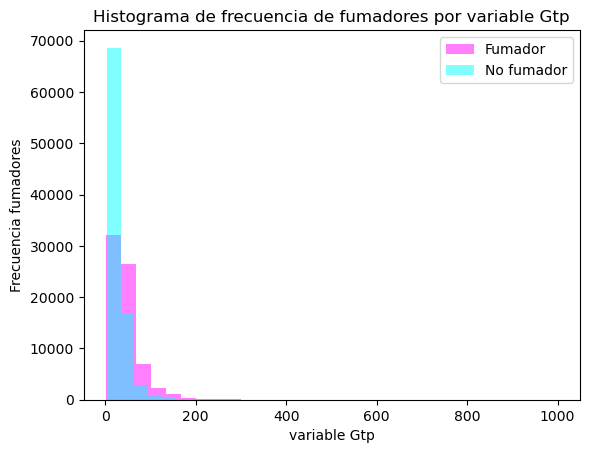

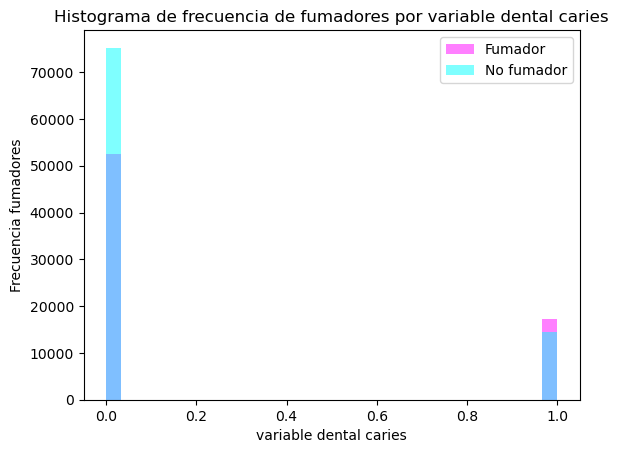

In [5]:
# histograma
for i in df_train.iloc[:,1:-1]:
    f = plt.hist(df_train.loc[df_train["smoking"] == 1,i], 
                 bins=30,
                 fc = (1,0,1,0.5),
                 label = "Fumador")# fc es el color y la transparencia
    nf = plt.hist(df_train.loc[df_train["smoking"] == 0,i],
                 bins=30,
                 fc = (0,1,1,0.5),
                 label = "No fumador")
    plt.legend()
    plt.xlabel(f'variable {i}')
    plt.ylabel("Frecuencia fumadores")
    plt.title(f'Histograma de frecuencia de fumadores por variable {i}')
    plt.show()

Superposición en casi todos los histogramas por lo que no parecen ser al menos de forma aislada muy significativos. Los que presentan menos superposición son: 'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
'HDL', 'LDL', 'hemoglobin', al igual que en un tercer grupo posteriormente comentado 'waist(cm)'. Variables asociadas a mediciones cardiacas y bioquímicas. Posiblemente el tabaquismo tenga influencia directa en ellas.

Vemos que las variables asociadas a edad, peso y altura por si solas no tienen mucha implicación sin embargo anchura de circunferencia de cintura que mide grasa abdominal e indirectamente obesidad si por lo que posteriormente se intentarán generar nuevas variables significativas. 

Es interesante observar algunas característica de las distribuciones. Por ejemplo:
* Caries y audición = dicotómicas
* Edad, peso, altura = se presentan como variables discretas
* importante la escala de las variables: por ejemplo en las mediciones de urine proteine